Md. Tanvir Jawad<br>ID: 21101221

In [1]:
try:
    from pint import UnitRegistry
except ImportError:
    !pip install pint

from pint import UnitRegistry
units = UnitRegistry()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 5.1 MB/s eta 0:00:00


In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [3]:
from modsim import *

In [5]:
A = Vector(3, 4)
show(A)

,component
x,3
y,4


In [10]:
A.x

3

In [11]:
A.y

4

In [12]:
A[0]

3

In [13]:
A[1]

4

In [14]:
B = Vector(1, 2)
show(A + B)

,component
x,4
y,6


In [15]:
show(A - B)

,component
x,2
y,2


In [16]:
mag = vector_mag(A)
theta = vector_angle(A)
mag, theta

(5.0, 0.9272952180016122)

In [17]:
from numpy import rad2deg

angle = rad2deg(theta)
angle

53.13010235415598

In [18]:
from numpy import deg2rad

theta = deg2rad(angle)
theta

0.9272952180016122

In [19]:
x, y = pol2cart(theta, mag)
C = Vector(x, y)
show(C)

,component
x,3.0
y,4.0


In [20]:
show(A / vector_mag(A))

,component
x,0.6
y,0.8


In [21]:
A_hat = vector_hat(A)
show(A_hat)

,component
x,0.6
y,0.8


In [69]:
params = Params(x = 0,y = 1,angle = 45,speed = 40,mass = 145e-3,diameter = 73e-3,C_d = 0.33,rho = 1.2,g = 9.8,t_end = 10)

In [23]:
from numpy import pi, deg2rad

def make_system(params):
    theta = deg2rad(params.angle)
    vx, vy = pol2cart(theta, params.speed)
    init = State(x=params.x, y=params.y, vx=vx, vy=vy)
    area = pi * (params.diameter/2)**2

    return System(params,
                  init = init,
                  area = area)

In [24]:
system = make_system(params)

In [25]:
show(system.init)

,state
x,0.000000
y,1.000000
vx,28.284271
vy,28.284271


In [26]:
def drag_force(V, system):
    rho, C_d, area = system.rho, system.C_d, system.area

    mag = rho * vector_mag(V)**2 * C_d * area / 2
    direction = -vector_hat(V)
    f_drag = mag * direction
    return f_drag

In [27]:
vx, vy = system.init.vx, system.init.vy
V_test = Vector(vx, vy)
f_drag = drag_force(V_test, system)
show(f_drag)

,component
x,-0.937574
y,-0.937574


In [28]:
def slope_func(t, state, system):
    x, y, vx, vy = state
    mass, g = system.mass, system.g

    V = Vector(vx, vy)
    a_drag = drag_force(V, system) / mass
    a_grav = g * Vector(0, -1)

    A = a_grav + a_drag

    return V.x, V.y, A.x, A.y

In [29]:
slope_func(0, system.init, system)

(28.284271247461902, 28.2842712474619, -6.466030881564545, -16.266030881564546)

In [30]:
def event_func(t, state, system):
    x, y, vx, vy = state
    return y

In [31]:
event_func(0, system.init, system)

1.0

In [32]:
results, details = run_solve_ivp(system, slope_func,
                                 events=event_func)
details.message

'A termination event occurred.'

In [33]:
results.tail()

,x,y,vx,vy
4.804692,96.438515,4.284486,14.590855,-20.726780
4.854740,97.166460,3.238415,14.484772,-21.065476
4.904789,97.889087,2.175515,14.378566,-21.400392
4.954838,98.606374,1.095978,14.272264,-21.731499
5.004887,99.318296,0.000000,14.165894,-22.058763


In [34]:
flight_time = results.index[-1]
flight_time

5.004887034868346

In [35]:
final_state = results.iloc[-1]
show(final_state)

,5.004887
x,99.318296
y,0.000000
vx,14.165894
vy,-22.058763


In [36]:
x_dist = final_state.x
x_dist

99.31829628352207

In [37]:
final_V = Vector(final_state.vx, final_state.vy)
show(final_V)

,component
x,14.165894
y,-22.058763


In [38]:
vector_mag(final_V)

26.215674453237572

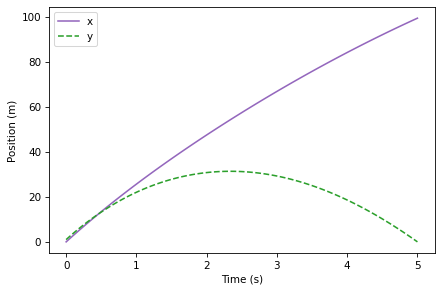

In [39]:
results.x.plot(color='C4')
results.y.plot(color='C2', style='--')

decorate(xlabel='Time (s)',
         ylabel='Position (m)')

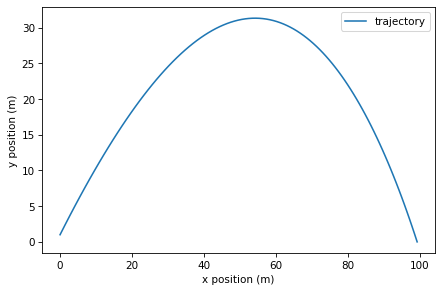

In [40]:
def plot_trajectory(results):
    x = results.x
    y = results.y
    make_series(x, y).plot(label='trajectory')

    decorate(xlabel='x position (m)',
             ylabel='y position (m)')

plot_trajectory(results)

In [41]:
rad2deg(vector_angle(final_V))

-57.29187097821225

In [42]:
from matplotlib.pyplot import plot

xlim = results.x.min(), results.x.max()
ylim = results.y.min(), results.y.max()

def draw_func(t, state):
    plot(state.x, state.y, 'bo')
    decorate(xlabel='x position (m)',
             ylabel='y position (m)',
             xlim=xlim,
             ylim=ylim)

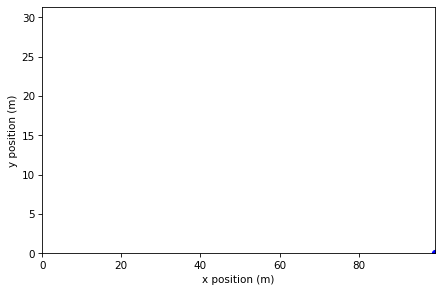

In [43]:
animate(results, draw_func)


In [44]:
system2 = make_system(params.set(C_d=0))

In [45]:
results2, details2 = run_solve_ivp(system2, slope_func,
                                   events=event_func)
details.message

'A termination event occurred.'

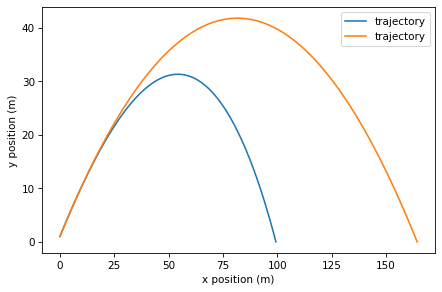

In [46]:
plot_trajectory(results)
plot_trajectory(results2)

In [47]:
x_dist2 = results2.iloc[-1].x
x_dist2

164.2592550241319

In [48]:
x_dist2 - x_dist

64.94095874060983

In [49]:
system3 = make_system(params.set(rho=1.0))

In [50]:
results3, details3 = run_solve_ivp(system3, slope_func,
                                   events=event_func)

x_dist3 = results3.iloc[-1].x
x_dist3

105.78838005859785

In [51]:
x_dist3 - x_dist

6.4700837750757785

In [52]:
download('https://github.com/AllenDowney/ModSim/raw/main/data/' +
         'baseball_drag.csv')

Downloaded baseball_drag.csv


In [54]:
from pandas import read_csv

baseball_drag = read_csv('baseball_drag.csv')

In [55]:
baseball_drag.head()

,Velocity in mph,Drag coefficient
0,0.058486,0.49965
1,19.845000,0.49878
2,39.476000,0.49704
3,50.181000,0.48225
4,60.134000,0.45004


In [56]:
mph_to_mps = (1 * units.mph).to(units.m/units.s).magnitude
speed = baseball_drag['Velocity in mph'] * mph_to_mps

In [57]:
C_d_series = make_series(speed, baseball_drag['Drag coefficient'])

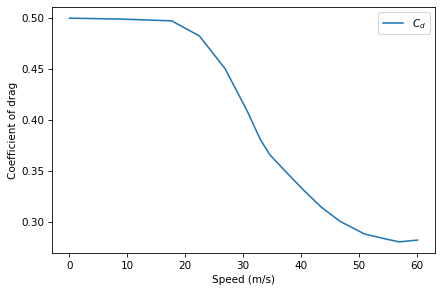

In [58]:
C_d_series.plot(label='$C_d$')
decorate(xlabel='Speed (m/s)',
         ylabel='Coefficient of drag')

In [59]:
drag_interp = interpolate(C_d_series)
drag_interp(30)

array(0.41607879)

In [60]:
def drag_force2(V, system):
    rho, area = system.rho, system.area

    C_d = drag_interp(vector_mag(V))
    mag = -rho * vector_mag(V)**2 * C_d * area / 2
    direction = vector_hat(V)
    f_drag = direction * mag
    return f_drag

In [61]:
def slope_func2(t, state, system):
    x, y, vx, vy = state
    mass, g = system.mass, system.g

    V = Vector(vx, vy)
    a_drag = drag_force2(V, system) / mass
    a_grav = g * Vector(0, -1)

    A = a_grav + a_drag

    return V.x, V.y, A.x, A.y

In [62]:
system4 = make_system(params)

In [63]:
V = Vector(30, 30)
f_drag = drag_force(V, system4)
show(f_drag)

,component
x,-1.054771
y,-1.054771


In [64]:
slope_func(0, system4.init, system4)

(28.284271247461902, 28.2842712474619, -6.466030881564545, -16.266030881564546)

In [65]:
results4, details4 = run_solve_ivp(system4, slope_func2,
                                   events=event_func)
details4.message

'A termination event occurred.'

In [66]:
results4.tail()

,x,y,vx,vy
4.722631,87.869695,3.989943e+00,12.094833,-19.677696
4.771825,88.462327,3.013834e+00,11.980462,-19.973270
4.821019,89.049363,2.023337e+00,11.866567,-20.265039
4.870213,89.630803,1.018656e+00,11.753207,-20.553016
4.919407,90.206647,1.065814e-14,11.640440,-20.837214


In [67]:
x_dist4 = results4.iloc[-1].x
x_dist4

90.20664656623305

In [68]:
x_dist4 - x_dist

-9.111649717289026

**MODIFICATION**

Scenario 1: Effect of Air Resistance
Objective: Compare the trajectories of a projectile with and without air resistance.


Scenario 2: Effect of Altitude
Objective: Analyze how the altitude affects the projectile's range.

Scenario 3: Variable Drag Coefficient
Objective: Investigate how a velocity-dependent drag coefficient affects the motion.

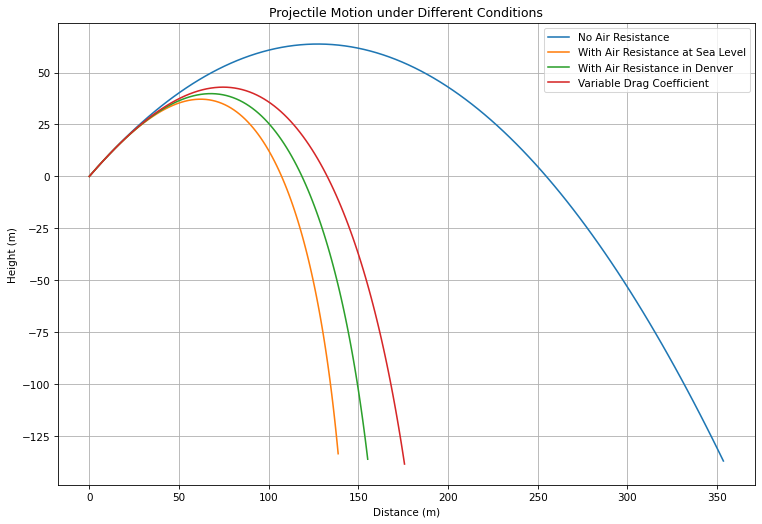

In [72]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants and parameters
g = 9.81
mass = 0.145
area = 0.0042
rho_sea_level = 1.225
rho_denver = 1.0

def get_drag_coefficient(speed):
    if speed < 10:
        return 0.5
    elif speed < 20:
        return 0.4
    else:
        return 0.3

def model(t, y, C_d, rho):
    x, y, vx, vy = y
    speed = np.sqrt(vx**2 + vy**2)
    if C_d == 'variable':
        C_d = get_drag_coefficient(speed)
    F_d = 0.5 * C_d * rho * area * speed**2
    ax = -F_d * vx / (mass * speed) if speed != 0 else 0
    ay = -g - (F_d * vy / (mass * speed)) if speed != 0 else -g
    return [vx, vy, ax, ay]

# Initial conditions
v0 = 50
angle = 45
y0 = [0, 0, v0 * np.cos(np.radians(angle)), v0 * np.sin(np.radians(angle))]

t_span = [0, 10]

# Scenario 1: Without Air Resistance
sol_no_drag = solve_ivp(model, t_span, y0, args=(0, rho_sea_level), max_step=0.1)

# Scenario 2: With Air Resistance at Sea Level
sol_with_drag = solve_ivp(model, t_span, y0, args=(0.47, rho_sea_level), max_step=0.1)

# Scenario 3: With Air Resistance in Denver
sol_denver = solve_ivp(model, t_span, y0, args=(0.47, rho_denver), max_step=0.1)
sol_variable_drag = solve_ivp(model, t_span, y0, args=('variable', rho_sea_level), max_step=0.1)

plt.figure(figsize=(12, 8))
plt.plot(sol_no_drag.y[0], sol_no_drag.y[1], label='No Air Resistance')
plt.plot(sol_with_drag.y[0], sol_with_drag.y[1], label='With Air Resistance at Sea Level')
plt.plot(sol_denver.y[0], sol_denver.y[1], label='With Air Resistance in Denver')
plt.plot(sol_variable_drag.y[0], sol_variable_drag.y[1], label='Variable Drag Coefficient')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Projectile Motion under Different Conditions')
plt.legend()
plt.grid(True)
plt.show()
